<a href="https://colab.research.google.com/github/Thirukumaran228/Thirukumaran228/blob/main/Stock%20market%20predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/TATASTEEL.NS.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,11.172855,11.214964,11.035300,11.186892,2.487110,10242229.0
1,1996-01-02,11.172855,11.214964,10.951082,10.979155,2.440924,16954313.0
2,1996-01-03,10.979155,11.229000,10.951082,10.981962,2.441549,13514114.0
3,1996-01-04,10.807913,10.807913,10.386825,10.633863,2.364158,34785820.0
4,1996-01-05,10.504730,10.555260,10.316644,10.423319,2.317350,30138033.0
...,...,...,...,...,...,...,...
6977,2023-09-20,130.449997,131.800003,128.000000,128.300003,128.300003,43627379.0
6978,2023-09-21,128.300003,129.250000,127.199997,127.800003,127.800003,29826091.0
6979,2023-09-22,127.150002,128.699997,125.500000,126.750000,126.750000,34059194.0
6980,2023-09-25,127.300003,128.300003,126.099998,127.400002,127.400002,23466981.0


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1996-01-01,11.186892
1,1996-01-02,10.979155
2,1996-01-03,10.981962
3,1996-01-04,10.633863
4,1996-01-05,10.423319
...,...,...
6977,2023-09-20,128.300003
6978,2023-09-21,127.800003
6979,2023-09-22,126.750000
6980,2023-09-25,127.400002


In [ ]:
df['Date']

0       1996-01-01
1       1996-01-02
2       1996-01-03
3       1996-01-04
4       1996-01-05
           ...    
6977    2023-09-20
6978    2023-09-21
6979    2023-09-22
6980    2023-09-25
6981    2023-09-26
Name: Date, Length: 6982, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-') Siri okay okay let me know if there's anything else I can help you with
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df

,Date,Close
0,1996-01-01,11.186892
1,1996-01-02,10.979155
2,1996-01-03,10.981962
3,1996-01-04,10.633863
4,1996-01-05,10.423319
...,...,...
6977,2023-09-20,128.300003
6978,2023-09-21,127.800003
6979,2023-09-22,126.750000
6980,2023-09-25,127.400002


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-6-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1996-01-01
1      1996-01-02
2      1996-01-03
3      1996-01-04
4      1996-01-05
          ...    
6977   2023-09-20
6978   2023-09-21
6979   2023-09-22
6980   2023-09-25
6981   2023-09-26
Name: Date, Length: 6982, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
1996-01-01,11.186892
1996-01-02,10.979155
1996-01-03,10.981962
1996-01-04,10.633863
1996-01-05,10.423319
...,...
2023-09-20,128.300003
2023-09-21,127.800003
2023-09-22,126.750000


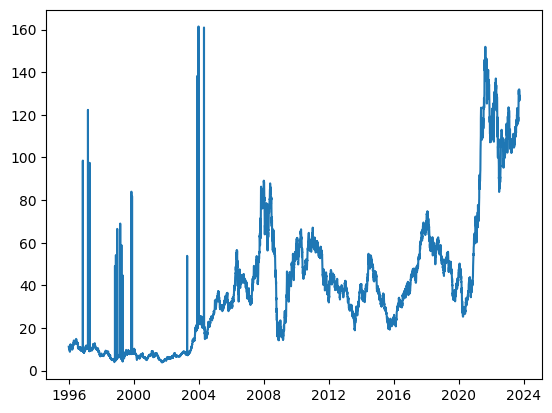

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,74.349998,74.114998,70.279999,72.315002
1,2021-03-26,74.114998,70.279999,72.315002,76.684998
2,2021-03-30,70.279999,72.315002,76.684998,80.000000
3,2021-03-31,72.315002,76.684998,80.000000,81.184998
4,2021-04-01,76.684998,80.000000,81.184998,86.305000
...,...,...,...,...,...
241,2022-03-16,130.169998,129.699997,123.375000,126.525002
242,2022-03-17,129.699997,123.375000,126.525002,130.345001
243,2022-03-21,123.375000,126.525002,130.345001,130.294998
244,2022-03-22,126.525002,130.345001,130.294998,130.199997


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((246,), (246, 3, 1), (246,))

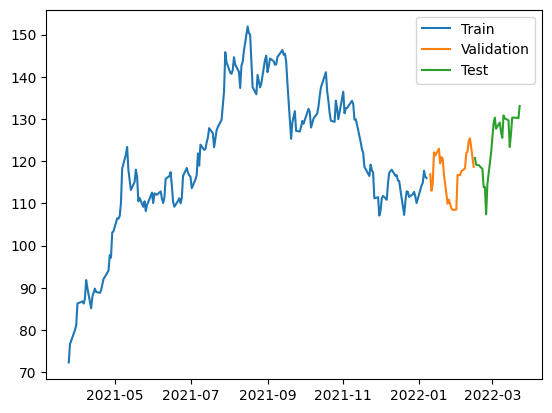

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 170ms/step - loss: 14630.6582 - mean_absolute_error: 119.8357 - val_loss: 13540.6348 - val_mean_absolute_error: 116.2576
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 14440.9043 - mean_absolute_error: 119.0478 - val_loss: 13342.2236 - val_mean_absolute_error: 115.4011
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 14217.7041 - mean_absolute_error: 118.1028 - val_loss: 13084.7764 - val_mean_absolute_error: 114.2802
Epoch 4/100
7/7 [==============================] - 0s 16ms/step - loss: 13925.3506 - mean_absolute_error: 116.8633 - val_loss: 12756.1875 - val_mean_absolute_error: 112.8334
Epoch 5/100
7/7 [==============================] - 0s 16ms/step - loss: 13562.8457 - mean_absolute_error: 115.2947 - val_loss: 12361.0879 - val_mean_absolute_error: 111.0686
Epoch 6/100
7/7 [==============================] - 0s 18ms/step - loss: 13127.1553 - mean_absolute_error: 113.3858 - val_loss: 11

7/7 [==============================] - 0s 3ms/step


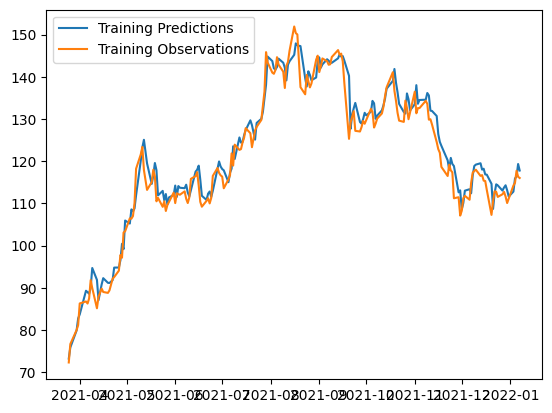

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 21ms/step


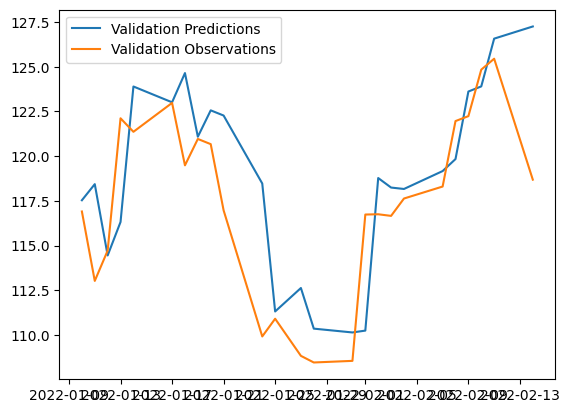

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 23ms/step


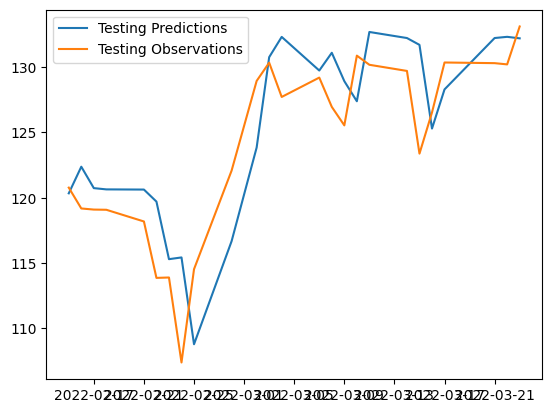

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

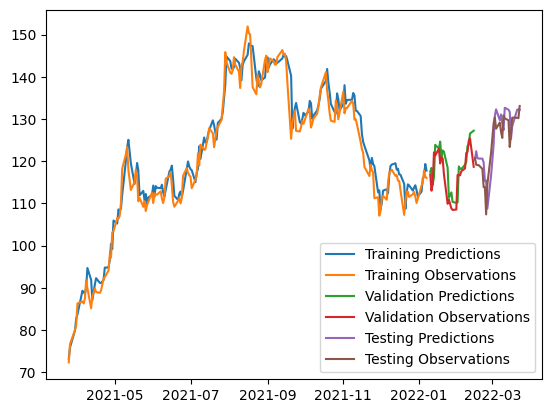

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 33ms/step


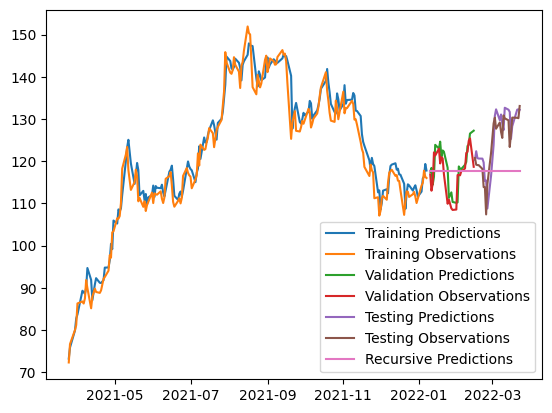

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])